Se quiere utilizar una red neuronal para predecir el número de usuarios que utilizarán un servicio de bicicletas públicas en una ciudad.  

El dataset “day.csv” se encuentra disponible en el siguiente enlace, donde también se describe cada una de las variables:
https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Bike%20Sharing  

**SE PIDE:**
Implementar una única red neuronal para predecir el uso de bicicletas de usuarios registrados (columna “registered”) y usuarios casuales (columna “casual”).  
Para ello:  
1)	Selecciona las variables que creas que puedan relacionarse con el objetivo  
2)	Transforma y prepara las variables para poder entrenar la red neuronal  
3)	Divide el conjunto de datos en entrenamiento (80%) y test (20%) con random_state=123  
4)	Diseña y entrena la red neuronal  
5)	Mide el desempeño para cada una de las variables de salida.  

¿En qué día del conjunto de test el modelo presenta más error para usuarios registrados y casuales?



In [1]:
import pandas as pd
import numpy as np

day = pd.read_csv('https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Bike%20Sharing/day.csv')

In [2]:
day.sample(4)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
199,200,2011-07-19,3,0,7,0,2,1,1,0.776667,0.747479,0.650417,0.130600,752,3789,4541
239,240,2011-08-28,3,0,8,0,0,0,1,0.707059,0.647959,0.561765,0.304659,1415,2919,4334
157,158,2011-06-07,2,0,6,0,2,1,1,0.707500,0.655950,0.597917,0.187808,763,4070,4833
511,512,2012-05-26,2,1,5,0,6,0,1,0.692500,0.642696,0.732500,0.198992,2855,3681,6536


In [4]:
from sklearn.model_selection import train_test_split
X = day[['season','yr','mnth','holiday','weekday','workingday',
        'weathersit','temp','atemp','hum','windspeed']]
y = day[['casual','registered']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                   random_state=123)

In [5]:
X_train.shape

(584, 11)

In [6]:
pd.concat([X_train,y_train],axis=1).corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
season,1.000000,0.001772,0.822845,-0.010066,-0.036938,0.011581,-0.006740,0.337351,0.346806,0.217442,-0.238207,0.213493,0.416023
yr,0.001772,1.000000,-0.001459,-0.011965,0.018720,-0.022242,-0.019963,0.073277,0.071204,-0.085142,-0.042130,0.258478,0.581260
mnth,0.822845,-0.001459,1.000000,-0.004058,-0.025541,-0.006635,0.013106,0.216033,0.224360,0.227032,-0.216125,0.120952,0.294245
holiday,-0.010066,-0.011965,-0.004058,1.000000,-0.107472,-0.251305,-0.033590,-0.002097,-0.007361,-0.018828,0.010098,0.077035,-0.098624
weekday,-0.036938,0.018720,-0.025541,-0.107472,1.000000,0.025443,0.058395,-0.013127,-0.023750,-0.054774,0.027333,0.053688,0.063013
workingday,0.011581,-0.022242,-0.006635,-0.251305,0.025443,1.000000,0.068909,0.051184,0.052418,0.029314,-0.029305,-0.517072,0.294984
weathersit,-0.006740,-0.019963,0.013106,-0.033590,0.058395,0.068909,1.000000,-0.144479,-0.140343,0.575957,0.051818,-0.246773,-0.266768
temp,0.337351,0.073277,0.216033,-0.002097,-0.013127,0.051184,-0.144479,1.000000,0.990494,0.117457,-0.151653,0.560583,0.568824
atemp,0.346806,0.071204,0.224360,-0.007361,-0.023750,0.052418,-0.140343,0.990494,1.000000,0.135134,-0.180357,0.558974,0.572362
hum,0.217442,-0.085142,0.227032,-0.018828,-0.054774,0.029314,0.575957,0.117457,0.135134,1.000000,-0.253027,-0.069307,-0.084881


<AxesSubplot:xlabel='temp', ylabel='atemp'>

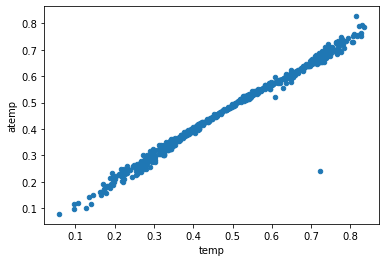

In [7]:
X_train[['temp','atemp']].plot.scatter(x='temp',y='atemp')

In [8]:
X_train = X_train.drop(columns=['atemp'])

In [9]:
from sklearn.preprocessing import MinMaxScaler
x_MinMax = MinMaxScaler()
y_MinMax = MinMaxScaler()

x = x_MinMax.fit_transform(X_train)
y = y_MinMax.fit_transform(y_train)

In [11]:
x.shape, y.shape

((584, 10), (584, 2))

In [12]:
y

array([[0.26085681, 0.92650881],
       [0.0991784 , 0.72408316],
       [0.21860329, 0.73678891],
       ...,
       [0.03139671, 0.46881317],
       [0.20070423, 0.22928097],
       [0.41519953, 0.76479931]])

In [30]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=500,hidden_layer_sizes=(50,50))
mlp.fit(x,y)

MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500)

In [31]:
pred_train = mlp.predict(x)
pred_train2 = y_MinMax.inverse_transform(pred_train)
pred_train2

array([[1075.10422678, 5890.7737413 ],
       [ 293.9882107 , 4902.45306259],
       [1171.47646816, 5563.70398033],
       ...,
       [ 304.97167638, 3648.99826628],
       [1204.24629475, 2846.57637005],
       [1214.35213399, 5614.5463533 ]])

In [32]:
pred_test = mlp.predict(x_MinMax.transform(X_test.drop(columns=['atemp'])))
pred_test2 = y_MinMax.inverse_transform(pred_test)
pred_test2

array([[ 8.86207671e+02,  4.73705856e+03],
       [ 1.06042518e+03,  2.23946784e+03],
       [ 7.85910040e+02,  1.20242950e+03],
       [ 4.22942324e+01,  2.74257702e+03],
       [ 6.59079393e+02,  3.45614740e+03],
       [ 1.47881232e+03,  2.36397127e+03],
       [ 5.30301786e+02,  3.57540622e+03],
       [ 6.32141864e+02,  4.35740391e+03],
       [ 1.14108367e+03,  6.00419366e+03],
       [ 3.18592181e+02,  3.87507549e+03],
       [ 3.84375412e+02,  3.41432295e+03],
       [ 1.16283974e+03,  3.67406462e+03],
       [ 1.63821734e+03,  3.11316718e+03],
       [ 1.16258272e+03,  4.53256296e+03],
       [ 4.05102260e+02,  2.17621919e+03],
       [ 9.00067380e+02,  4.03061442e+03],
       [ 1.29340269e+03,  2.12865286e+03],
       [ 1.69453602e+03,  3.35296021e+03],
       [ 1.06545732e+03,  5.93841590e+03],
       [ 5.75672924e+02,  5.33418117e+03],
       [ 2.04146372e+03,  4.76380776e+03],
       [ 1.39635809e+03,  2.37379157e+03],
       [ 1.39994499e+01,  1.48300280e+03],
       [ 9.

In [33]:
y_test['pred_casual'] = pred_test2[:,0]
y_test['pred_reg'] = pred_test2[:,1]
y_test['pred_casual'] = round(y_test['pred_casual']).astype('int')
y_test['pred_reg'] = round(y_test['pred_reg']).astype('int')

y_test['pred_casual'] = np.where(y_test.pred_casual<0, 0, y_test.pred_casual)
y_test['pred_reg'] = np.where(y_test.pred_reg<0, 0, y_test.pred_reg)

y_test.describe()

,casual,registered,pred_casual,pred_reg
count,147.000000,147.000000,147.000000,147.000000
mean,844.761905,3713.918367,824.789116,3704.911565
std,611.005934,1545.917866,540.903965,1394.718074
min,25.000000,491.000000,0.000000,573.000000
25%,395.500000,2693.500000,478.500000,2727.500000
50%,727.000000,3634.000000,763.000000,3674.000000
75%,1096.000000,4941.000000,1119.000000,4543.000000
max,3160.000000,6844.000000,2756.000000,6384.000000


In [34]:
# Error en los usuarios registrados
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mse = mean_squared_error(y_test.registered,y_test.pred_reg,squared=False)
r2 = r2_score(y_test.registered,y_test.pred_reg)

print('Test MSE Error = ',mse)
print('Test R2 = ', r2)

Test MSE Error =  652.7123523926803
Test R2 =  0.8205120448694868


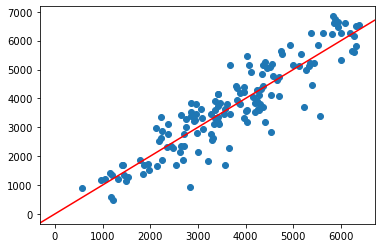

In [35]:
fig, ax = plt.subplots()
plt.plot(y_test.pred_reg, y_test.registered,'o')
plt.axline([0,0],[1,1],color='red')

In [36]:
# Casuales

mse = mean_squared_error(y_test.casual,y_test.pred_casual,squared=False)
r2 = r2_score(y_test.casual,y_test.pred_casual)
print("Test MSE Error:",mse)
print("Test R2:",r2)

Test MSE Error: 341.8552026689615
Test R2: 0.684820464838275


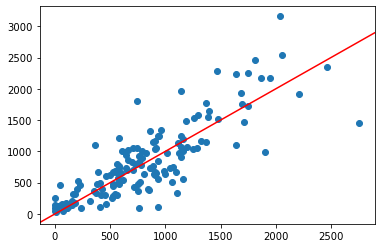

In [37]:
fig, ax = plt.subplots()
plt.plot(y_test.pred_casual, y_test.casual,'o')
plt.axline([0,0],[1,1],color='red');

In [40]:
# Día de más fallos
y_test['DifCasual'] = np.abs(y_test.casual-y_test.pred_casual)
y_test['DifReg'] = np.abs(y_test.registered-y_test.pred_reg)
y_test

,casual,registered,pred_casual,pred_reg,DifCasual,DifReg
488,764,5657,886,4737,122,920
421,515,2874,1060,2239,545,635
91,898,1354,786,1202,112,152
300,456,3291,42,2743,414,548
177,854,3854,659,3456,195,398
...,...,...,...,...,...,...
631,2454,5453,1810,4028,644,1425
548,904,5323,1138,6003,234,680
439,1005,5187,784,4553,221,634
449,1532,3464,1261,3554,271,90


In [56]:
y_test

,casual,registered,pred_casual,pred_reg,DifCasual,DifReg
488,764,5657,886,4737,122,920
421,515,2874,1060,2239,545,635
91,898,1354,786,1202,112,152
300,456,3291,42,2743,414,548
177,854,3854,659,3456,195,398
...,...,...,...,...,...,...
631,2454,5453,1810,4028,644,1425
548,904,5323,1138,6003,234,680
439,1005,5187,784,4553,221,634
449,1532,3464,1261,3554,271,90


In [49]:
idxmax = y_test.loc[y_test.DifCasual == y_test.DifCasual.max()].index.values[0]
day.iloc[idxmax,:].dteday

'2012-07-07'

In [55]:
idxmax2 = y_test.loc[y_test.DifReg == y_test.DifReg.max()].index.values[0]
day.iloc[idxmax2,:].dteday

'2012-07-07'

<AxesSubplot:xlabel='dteday'>

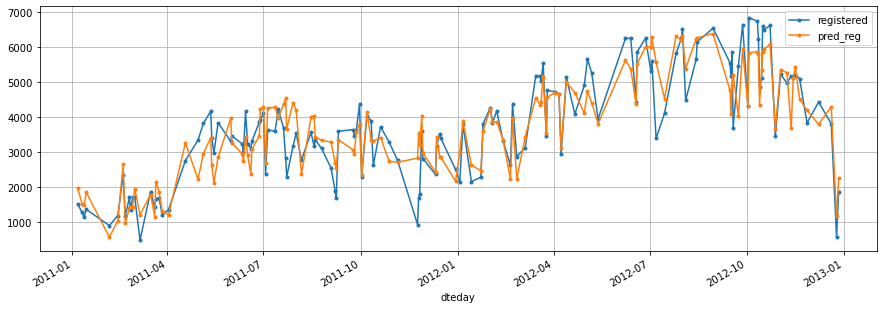

In [52]:
df = pd.merge(day, y_test[['pred_casual','pred_reg']], left_index=True, right_index=True)
df.dteday= pd.to_datetime(df.dteday)
df.plot(x='dteday',y=['registered','pred_reg'],figsize=(15,5),style='.-',grid=True)

<AxesSubplot:xlabel='dteday'>

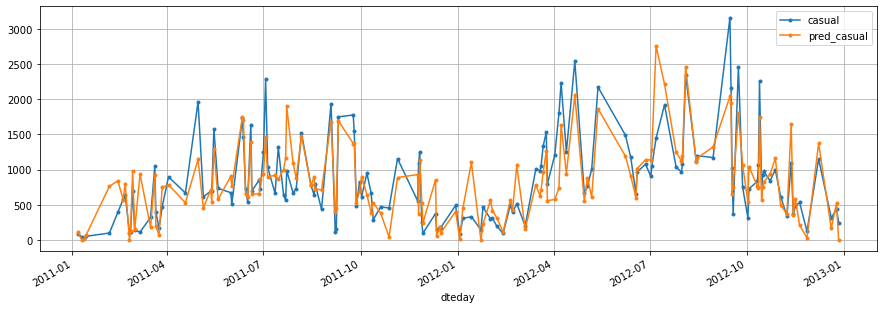

In [53]:
df.dteday= pd.to_datetime(df.dteday)
df.plot(x='dteday',y=['casual','pred_casual'],figsize=(15,5),style='.-',grid=True)

In [57]:
from sklearn.model_selection import GridSearchCV

mlp3 = MLPRegressor()
    
parameters = {
    'hidden_layer_sizes': [(20,), (30,), (50,), (20,20), (30,15), (50,50), (100,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'max_iter':[100,500,1000]
}

clf = GridSearchCV(mlp3, parameters, n_jobs=-1, cv=10)
clf.fit(x,y)

GridSearchCV(cv=10, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(20,), (30,), (50,), (20, 20),
                                                (30, 15), (50, 50),
                                                (100, 100)],
                         'max_iter': [100, 500, 1000],
                         'solver': ['sgd', 'adam']})

In [58]:
clf.best_params_

{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (100, 100),
 'max_iter': 100,
 'solver': 'adam'}

In [59]:
pred_test = clf.predict(x_MinMax.transform(X_test.drop(columns=['atemp'])))
pred_test2 = y_MinMax.inverse_transform(pred_test)
pred_test2

array([[ 9.00165629e+02,  4.98556205e+03],
       [ 8.98700032e+02,  2.55018661e+03],
       [ 7.06470045e+02,  1.52500822e+03],
       [ 1.36667418e+02,  2.87399648e+03],
       [ 7.38246432e+02,  3.84789071e+03],
       [ 1.56996832e+03,  2.73583617e+03],
       [ 5.78675543e+02,  3.89350883e+03],
       [ 6.32050433e+02,  4.92537749e+03],
       [ 1.19934344e+03,  5.93483573e+03],
       [ 4.23576810e+02,  4.17921361e+03],
       [ 3.89599797e+02,  3.43036848e+03],
       [ 9.21609910e+02,  3.50306089e+03],
       [ 1.98119882e+03,  3.67107421e+03],
       [ 1.05507319e+03,  4.38749600e+03],
       [ 2.87649938e+02,  2.44331527e+03],
       [ 8.16498819e+02,  4.03291390e+03],
       [ 1.30706147e+03,  2.02240381e+03],
       [ 1.77979479e+03,  3.22070509e+03],
       [ 1.10351838e+03,  5.97599674e+03],
       [ 6.42058355e+02,  5.06797904e+03],
       [ 2.49369131e+03,  4.76888420e+03],
       [ 1.61773234e+03,  2.61642297e+03],
       [-5.22297898e+01,  1.19935742e+03],
       [ 8.

In [60]:
y_test['pred_casual'] = pred_test2[:,0]
y_test['pred_reg'] = pred_test2[:,1]

y_test['pred_casual'] = y_test['pred_casual'].astype('int')
y_test['pred_reg'] = y_test['pred_reg'].astype('int')

y_test['pred_casual'] = np.where(y_test.pred_casual<0,0,y_test.pred_casual)
y_test['pred_reg'] = np.where(y_test.pred_reg<0,0,y_test.pred_reg)

y_test

,casual,registered,pred_casual,pred_reg,DifCasual,DifReg
488,764,5657,900,4985,122,920
421,515,2874,898,2550,545,635
91,898,1354,706,1525,112,152
300,456,3291,136,2873,414,548
177,854,3854,738,3847,195,398
...,...,...,...,...,...,...
631,2454,5453,1971,4530,644,1425
548,904,5323,1146,6184,234,680
439,1005,5187,895,5038,221,634
449,1532,3464,1419,2931,271,90


In [61]:
# Registrados
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mse = mean_squared_error(y_test.registered,y_test.pred_reg,squared=False)
r2 = r2_score(y_test.registered,y_test.pred_reg)
print("Test MSE Error:",mse)
print("Test R2:",r2)

Test MSE Error: 582.1097857973945
Test R2: 0.8572416739481528


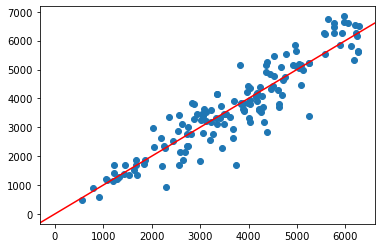

In [62]:
fig, ax = plt.subplots()
plt.plot(y_test.pred_reg, y_test.registered,'o')
plt.axline([0,0],[1,1],color='red');

In [63]:
# Casuales

mse = mean_squared_error(y_test.casual,y_test.pred_casual,squared=False)
r2 = r2_score(y_test.casual,y_test.pred_casual)
print("Test MSE Error:",mse)
print("Test R2:",r2)

Test MSE Error: 294.28319462629156
Test R2: 0.7664367299911996


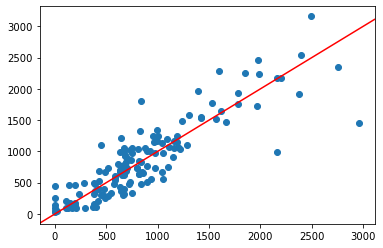

In [64]:
fig, ax = plt.subplots()
plt.plot(y_test.pred_casual, y_test.casual,'o')
plt.axline((0,0),(1,1),color='red');

In [65]:
# Día de más fallos
y_test['DifCasual'] = np.abs(y_test.casual-y_test.pred_casual)
y_test['DifReg'] = np.abs(y_test.registered-y_test.pred_reg)
y_test

,casual,registered,pred_casual,pred_reg,DifCasual,DifReg
488,764,5657,900,4985,136,672
421,515,2874,898,2550,383,324
91,898,1354,706,1525,192,171
300,456,3291,136,2873,320,418
177,854,3854,738,3847,116,7
...,...,...,...,...,...,...
631,2454,5453,1971,4530,483,923
548,904,5323,1146,6184,242,861
439,1005,5187,895,5038,110,149
449,1532,3464,1419,2931,113,533


In [66]:
idxmax = y_test.loc[y_test.DifCasual == y_test.DifCasual.max()].index.values[0]
day.iloc[idxmax,:].dteday

'2012-07-07'

In [67]:
idxmax2 = y_test.loc[y_test.DifReg == y_test.DifReg.max()].index.values[0]
day.iloc[idxmax2,:].dteday

'2011-11-25'